In [2]:
import pandas as pd
import re
import os 
import ast
import spacy
from nltk.sentiment import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt


In [3]:
def find_repo_root(start_path):
    """
    useful general function for finding the (first, closest) repo root so github file paths work the same on different machines 
    """
    current_path = os.path.abspath(start_path)
    
    while True:
        # Check for the existence of the .git directory or other indicators
        if os.path.isdir(os.path.join(current_path, '.git')) or \
           os.path.isfile(os.path.join(current_path, 'README.md')):
            return current_path
        
        parent_path = os.path.dirname(current_path)
        
        # Stop if we reach the root directory
        if parent_path == current_path:
            break
        
        current_path = parent_path

    return None  # Return None if not found

root = find_repo_root(os.getcwd())

root = root.replace('\\', '/')

In [4]:
df = pd.read_parquet(f"{root}/Data/Whole_sets/cleaned_n=8_comments.parquet")


In [5]:
df['Movie'].iloc[1]

{'directors': array(['Savage Steve Holland'], dtype=object),
 'genres': array(['Romance', 'Comedy'], dtype=object),
 'rating': '3.54 out of 5',
 'title': 'better-off-dead',
 'url': 'https://letterboxd.com/film/better-off-dead/',
 'year': '1985'}

In [6]:
df_exploded = df[['review_stars', 'reviews_extracted', 'review_dates']].apply(pd.Series.explode)
df_exploded.reset_index(names='merger', inplace=True)

In [7]:
df.drop(columns=[
    'review_stars',
    'review_dates',
    'reviews_extracted'
], inplace=True)

In [8]:
df.reset_index(names='merger', inplace=True)

In [9]:
df_by_row = df.merge(df_exploded, on='merger')

In [10]:
df_by_row.columns
df_by_row.drop(columns=[
    'merger',
    'comments',
    'reviews_extracted_lower', 'reviews_mash',
], inplace=True
)


In [11]:
df_by_row['review'] = df_by_row['reviews_extracted']

In [12]:
df_by_row

,letterboxd_search,Movie,genres,avg_rating,directors,review_stars,reviews_extracted,review_dates,review
0,https://letterboxd.com/search/Puerta+De+Hierro...,"{'directors': ['Víctor Laplace', 'Dieguillo Fe...",[],3.30 out of 5,"[Víctor Laplace, Dieguillo Fernández]",8.0,"Yo no entendí bien la película, Perón sabía qu...",09 Nov 2020,"Yo no entendí bien la película, Perón sabía qu..."
1,https://letterboxd.com/search/Puerta+De+Hierro...,"{'directors': ['Víctor Laplace', 'Dieguillo Fe...",[],3.30 out of 5,"[Víctor Laplace, Dieguillo Fernández]",9.0,Me pareció excelente. Impecable en términos hi...,17 Jul 2020,Me pareció excelente. Impecable en términos hi...
2,https://letterboxd.com/search/Puerta+De+Hierro...,"{'directors': ['Víctor Laplace', 'Dieguillo Fe...",[],3.30 out of 5,"[Víctor Laplace, Dieguillo Fernández]",4.0,Esta película cuando la vi por primera vez me ...,08 Mar 2021,Esta película cuando la vi por primera vez me ...
3,https://letterboxd.com/search/Puerta+De+Hierro...,"{'directors': ['Víctor Laplace', 'Dieguillo Fe...",[],3.30 out of 5,"[Víctor Laplace, Dieguillo Fernández]",10.0,"""Eva querida, vuelvo. Vuelvo a nuestra tierra....",21 Aug 2022,"""Eva querida, vuelvo. Vuelvo a nuestra tierra...."
4,https://letterboxd.com/search/Puerta+De+Hierro...,"{'directors': ['Víctor Laplace', 'Dieguillo Fe...",[],3.30 out of 5,"[Víctor Laplace, Dieguillo Fernández]",6.0,"Lanusse, marmotaPerón va a venir cuando le can...",20 Apr 2024,"Lanusse, marmotaPerón va a venir cuando le can..."
...,...,...,...,...,...,...,...,...,...
1001274,https://letterboxd.com/search/Spellbinder+1988/,"{'directors': ['Janet Greek'], 'genres': ['Hor...","[Horror, Drama, Romance]",2.93 out of 5,[Janet Greek],6.0,Timmy Daly plays the nicest lawyer ever. He al...,,Timmy Daly plays the nicest lawyer ever. He al...
1001275,https://letterboxd.com/search/Spellbinder+1988/,"{'directors': ['Janet Greek'], 'genres': ['Hor...","[Horror, Drama, Romance]",2.93 out of 5,[Janet Greek],7.0,I had SO MUCH FUN watching Spellbinder. Kelly ...,18 Oct 2013,I had SO MUCH FUN watching Spellbinder. Kelly ...
1001276,https://letterboxd.com/search/Spellbinder+1988/,"{'directors': ['Janet Greek'], 'genres': ['Hor...","[Horror, Drama, Romance]",2.93 out of 5,[Janet Greek],5.0,31 Days of Halloween Day #25Got pretty repetit...,25 Oct 2024,31 Days of Halloween Day #25Got pretty repetit...
1001277,https://letterboxd.com/search/Spellbinder+1988/,"{'directors': ['Janet Greek'], 'genres': ['Hor...","[Horror, Drama, Romance]",2.93 out of 5,[Janet Greek],6.0,I am extremely tickled by the male fantasy Mir...,10 Dec 2023,I am extremely tickled by the male fantasy Mir...


In [13]:

"""
Run this if you need to update with new movies.

Note that this requires running the script in letter4.ipynb
"""

# import pyarrow.parquet as pq
# import pyarrow as pa
# from datetime import datetime

# sia = SentimentIntensityAnalyzer()

# def get_sentiment_scores(review):
#     try:
#         sentiment = sia.polarity_scores(review)
#         return sentiment['compound'] 
#     except Exception as e:
#         print(review, e)
#         return pd.NA

# # Process the DataFrame in chunks and append to a Parquet file
# def process_in_chunks(input_df, start=0, chunk_size=2000, output_file=f"{root}/Data/Whole_sets/sentiment_by_unique_review.parquet"):
#     # Open ParquetWriter for appending to the output file
#     parquet_writer = None
    
#     # Iterate through DataFrame in chunks
#     for start_row in range(start, len(input_df), chunk_size):
#         end_row = start_row + chunk_size
#         chunk = input_df.iloc[start_row:end_row].copy()
#         print(f"Started processing rows {start_row} to {end_row} at {datetime.now().strftime('%H: %M: %S')}")

#         # Apply sentiment analysis on the 'review' column
#         chunk['sentiment'] = chunk['review'].apply(get_sentiment_scores)

#         # Convert the chunk to a PyArrow Table
#         table = pa.Table.from_pandas(chunk)

#         # If this is the first chunk, create the Parquet file and open the writer
#         if parquet_writer is None:
#             # Open the ParquetWriter outside the loop for appending
#             parquet_writer = pq.ParquetWriter(output_file, table.schema, compression='SNAPPY')
        
#         # Write the chunk to the Parquet file
#         parquet_writer.write_table(table)
#         print(f"Processed and appended rows {start_row} to {end_row} at {datetime.now().strftime('%H: %M: %S')}")

#     # Close the writer when done
#     if parquet_writer is not None:
#         parquet_writer.close()

# process_in_chunks(df_by_row)

'\nRun this if you need to update with new movies.\n\nNote that this requires running the script in letter4.ipynb\n'

In [14]:
df = pd.read_parquet(f"{root}/Data/Whole_sets/sentiment_by_unique_review.parquet")

In [15]:
import seaborn as sns

<Axes: xlabel='sentiment', ylabel='Count'>

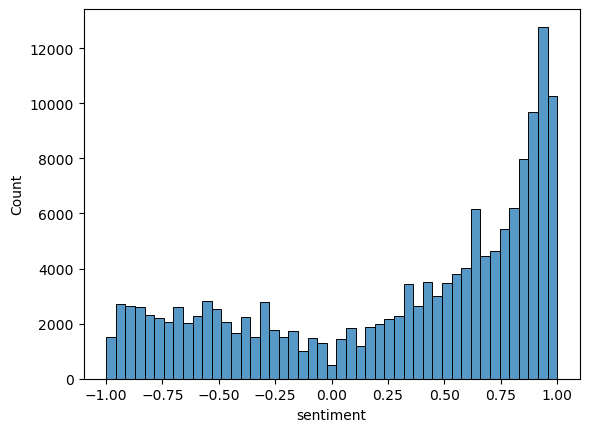

In [16]:
high_star = df[df['review_stars']>8]
sns.histplot(data=high_star[high_star['sentiment']!=0], x='sentiment')

<Axes: xlabel='sentiment', ylabel='Count'>

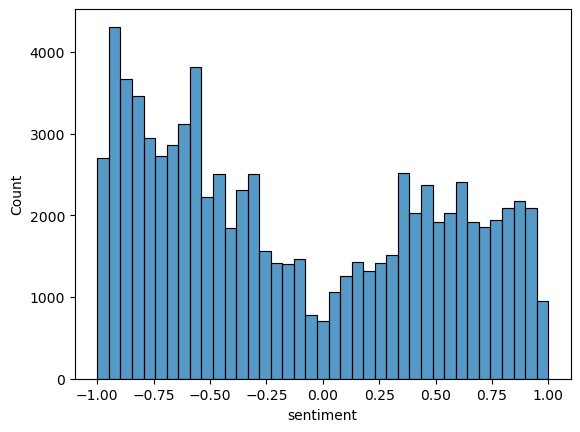

In [17]:
low_star = df[df['review_stars']<4]
sns.histplot(data=low_star[low_star['sentiment']!=0], x='sentiment')

<Axes: xlabel='sentiment', ylabel='Count'>

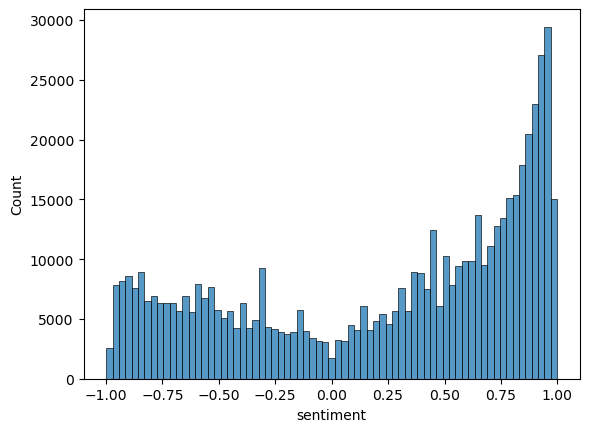

In [18]:
mid_star = df[(df['review_stars'] >= 4) & (df['review_stars'] <= 8)]
sns.histplot(data=mid_star[mid_star['sentiment']!=0], x='sentiment')

<Axes: xlabel='sentiment', ylabel='Count'>

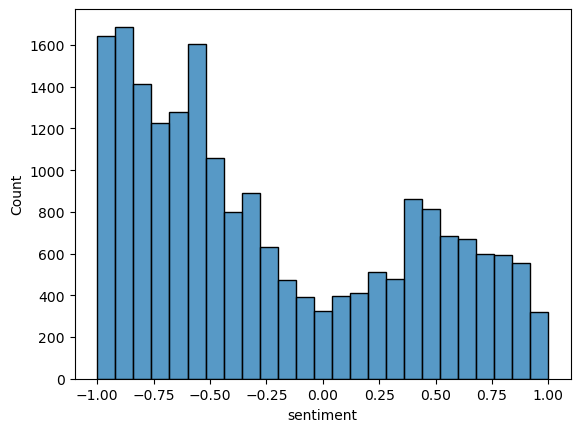

In [19]:
mid_star_1 = df[df['review_stars'] == 1]
sns.histplot(data=mid_star_1[mid_star_1['sentiment']!=0], x='sentiment')

<Axes: xlabel='review_stars', ylabel='Count'>

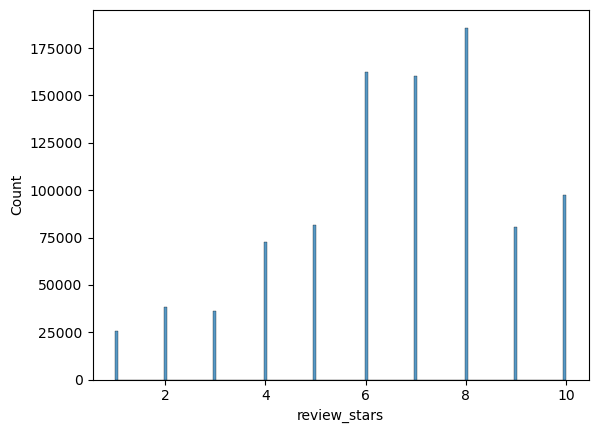

In [20]:
sns.histplot(data=df, x='review_stars')

In [21]:
df.columns

Index(['letterboxd_search', 'Movie', 'genres', 'avg_rating', 'directors',
       'review_stars', 'reviews_extracted', 'review_dates', 'review',
       'sentiment'],
      dtype='object')

<Axes: xlabel='sentiment', ylabel='Count'>

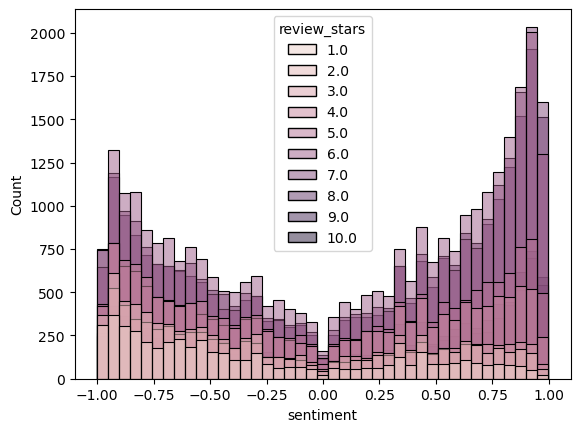

In [22]:
horror = df[df['genres'].apply(lambda genres: 'Horror' in genres)]
sns.histplot(horror[horror['sentiment'] != 0], x='sentiment', hue='review_stars')


<Axes: xlabel='sentiment', ylabel='Count'>

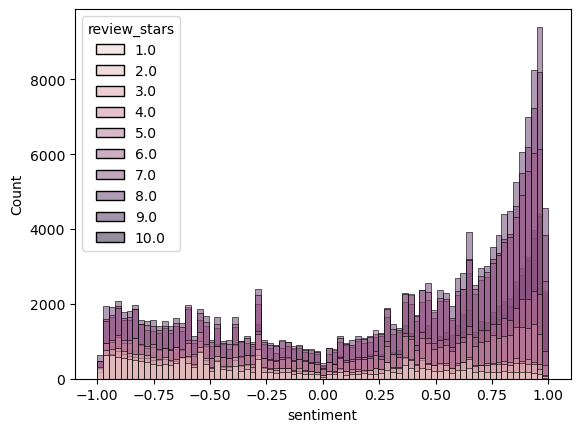

In [23]:
sns.histplot(df[df['sentiment'] != 0], x='sentiment', hue='review_stars')

<Axes: xlabel='sentiment', ylabel='Count'>

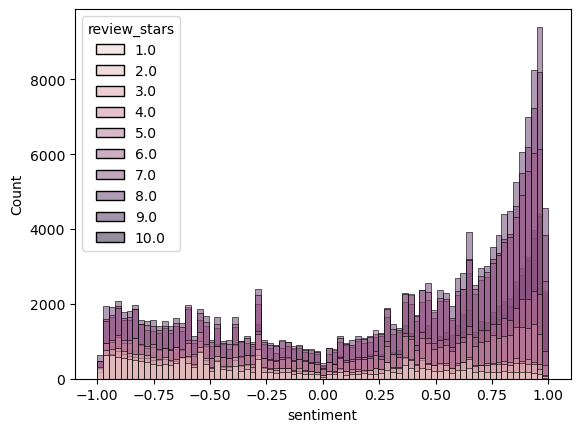

In [24]:
sns.histplot(df[df['sentiment'] != 0], x='sentiment', hue='review_stars')

In [25]:
exploded_genres = df['genres'].explode()
genre_types = exploded_genres.unique().tolist()
genre_types = genre_types[1:]

In [26]:
genre_types

['Romance',
 'Comedy',
 'Action',
 'Adventure',
 'Horror',
 'Thriller',
 'Crime',
 'Drama',
 'History',
 'Mystery',
 'War',
 'Science Fiction',
 'TV Movie',
 'Fantasy',
 'Music',
 'Family',
 'Documentary',
 'Western',
 'Animation']

In [27]:
df['review_stars_binned'] = pd.cut(
    df['review_stars'],
    bins = [0, 2, 4, 6, 8, 11],
    labels=[1, 2, 3, 4, 5],
    right=True
)
df[['review_stars', 'review_stars_binned']]


def threshold_sentiment(x):
    if x >=  .05: return 'Positive'
    elif x >= -.05 and x < .05: return 'Neutral'
    else: return 'Negative'

df['threshold_sentiment'] = df['sentiment'].apply(threshold_sentiment)
sentiment_order = ['Negative', 'Neutral', 'Positive']
df['threshold_sentiment'] = pd.Categorical(df['threshold_sentiment'], categories=sentiment_order, ordered=True)

In [28]:
# hist_path = "Figures/Sentiment/Overall_Histograms"
# df_no_0_sent = df[df['sentiment'] != 0]
# for genre in genre_types:
#     path = f"{root}/{hist_path}/{genre}_sentiment_stars_histplot.png"

#     gdf  =  df_no_0_sent[df_no_0_sent['genres'].apply(lambda lst: genre in lst)].copy()

#     fig, ax_ = plt.subplots(1)
#     sns.histplot(data=gdf, x='sentiment', hue='review_stars_binned', multiple='stack', ax=ax_, palette="Set1")
#     labels_ = ['★'*i for i in range(1,6)]
#     handles = [patch for patch in ax_.patches[0::int(len(ax_.patches)/5)]]


#     plt.legend(title="Right Binned Rating", labels=labels_, handles=handles)
#     plt.title(f"{genre} Sentiment Histogram by Binned Rating")
#     plt.xlabel("VADER Sentiment Compound Score")
#     plt.ylabel("Review Count")
#     plt.savefig(path)
#     plt.close()


# hist_path = "Figures/Sentiment/Threshold_Histograms"
# for genre in genre_types:
#     path = f"{root}/{hist_path}/{genre}_threshold_sentiment_stars_histplot.png"

#     gdf  =  df[df['genres'].apply(lambda lst: genre in lst)].copy()
#     gdf = gdf.sort_values(by='sentiment')

#     fig, ax_ = plt.subplots(1)
#     sns.histplot(data=gdf, x='threshold_sentiment', hue='review_stars_binned',
#                   multiple='stack', ax=ax_, palette="Set1", discrete=True)
#     labels_ = ['★'*i for i in range(1,6)]
#     handles = [patch for patch in ax_.patches[0::int(len(ax_.patches)/5)]]


#     plt.legend(title="Right Binned Rating", labels=labels_, handles=handles)
#     plt.title(f"{genre} Thresholded Sentiment Histogram by Binned Rating")
#     plt.xlabel("VADER Sentiment Threshold Category")
#     plt.ylabel("Review Count")
#     plt.savefig(path)
#     plt.close()

In [29]:
hist_path = "Figures/Sentiment/Overall_Histograms_Normed"
df_no_0_sent = df[df['sentiment'] != 0]
for genre in genre_types:
    path = f"{root}/{hist_path}/{genre}_normed_sentiment_stars_histplot.png"

    gdf  =  df_no_0_sent[df_no_0_sent['genres'].apply(lambda lst: genre in lst)].copy()

    fig, ax_ = plt.subplots(1)
    sns.histplot(data=gdf, x='sentiment', hue='review_stars_binned', 
                 multiple='stack', ax=ax_, palette="Set1", stat='density', bins=40)
    labels_ = ['★'*i for i in range(1,6)]
    handles = [patch for patch in ax_.patches[0::int(len(ax_.patches)/5)]]


    plt.legend(title="Right Binned Rating", labels=labels_, handles=handles)
    plt.title(f"Density {genre} Sentiment Histogram by Binned Rating")
    plt.xlabel("VADER Sentiment Compound Score")
    plt.ylabel("Review Count")
    plt.ylim(0, 1.8)
    plt.savefig(path)
    plt.close()


hist_path = "Figures/Sentiment/Threshold_Histograms_Normed"
for genre in genre_types:
    path = f"{root}/{hist_path}/{genre}_normed_threshold_sentiment_stars_histplot.png"

    gdf  =  df[df['genres'].apply(lambda lst: genre in lst)].copy()
    gdf = gdf.sort_values(by='sentiment')

    fig, ax_ = plt.subplots(1)
    sns.histplot(data=gdf, x='threshold_sentiment', hue='review_stars_binned',
                  multiple='stack', ax=ax_, palette="Set1", discrete=True, stat='density')
    labels_ = ['★'*i for i in range(1,6)]
    handles = [patch for patch in ax_.patches[0::int(len(ax_.patches)/5)]]


    plt.legend(title="Right Binned Rating", labels=labels_, handles=handles)
    plt.title(f"Density {genre} Thresholded Sentiment Histogram by Binned Rating")
    plt.xlabel("VADER Sentiment Threshold Category")
    plt.ylabel("Review Count")
    plt.ylim(0, .8)
    plt.savefig(path)
    plt.close()